In [1]:
import xarray as xr
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import pynsitu as pyn

In [9]:

time = pd.date_range(start="2000/01/01", end="2000/02/01", freq="1T")

ds = xr.Dataset(dict(x=("time", np.random.randn(time.size)),
                     y=("time", np.random.randn(time.size)),
                    ),
                coords=dict(time=time)
               )
#ds["lon"] = ds["x"]
#ds["lat"] = ds["y"]
#df = ds.to_dataframe()

In [10]:
ds["v"] = ds["x"].differentiate("time", datetime_unit="s")
ds["a"] = ds["v"].differentiate("time", datetime_unit="s")

In [11]:
float(ds["a"].std())

0.0001707097970278403

In [12]:
ds

<xarray.Dataset>
Dimensions:  (time: 44641)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-01T00:01:00 ... 2000-02-01
Data variables:
    x        (time) float64 0.4243 0.1359 0.02603 ... -0.005853 -0.6772 1.289
    y        (time) float64 -0.3691 0.4984 -0.454 0.7781 ... -2.982 0.73 0.2832
    v        (time) float64 -0.004807 -0.003319 0.00425 ... 0.01079 0.03278
    a        (time) float64 2.48e-05 7.547e-05 8.678e-05 ... 0.0002784 0.0003664

In [23]:
dsl = ds.resample(dict(time="30T")).interpolate()
dsl["v"] = dsl["x"].differentiate("time", datetime_unit="s")
dsl["a"] = dsl["v"].differentiate("time", datetime_unit="s")

In [25]:
float(ds["a"].std())/float(dsl["a"].std())

892.3683801479075

In [26]:
30**2

900

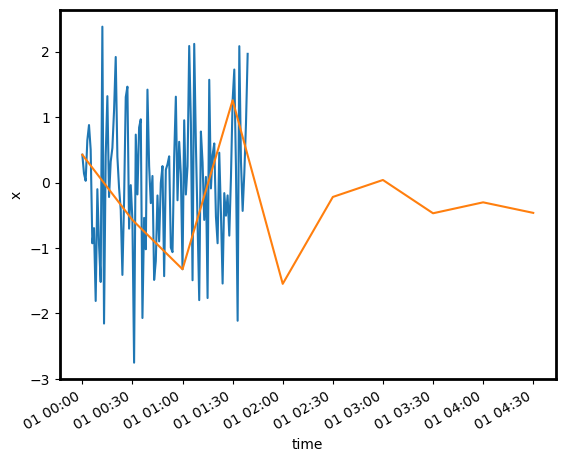

In [22]:
ds["x"][:100].plot()
_ds["x"][:10].plot()

In [44]:
ds.differentiate?

Signature:
ds.differentiate(
    coord: 'Hashable',
    edge_order: 'Literal[1, 2]' = 1,
    datetime_unit: 'DatetimeUnitOptions | None' = None,
) -> 'T_Dataset'
Docstring:
Differentiate with the second order accurate central
differences.

.. note::
    This feature is limited to simple cartesian geometry, i.e. coord
    must be one dimensional.

Parameters
----------
coord : Hashable
    The coordinate to be used to compute the gradient.
edge_order : {1, 2}, default: 1
    N-th order accurate differences at the boundaries.
datetime_unit : None or {"Y", "M", "W", "D", "h", "m", "s", "ms",             "us", "ns", "ps", "fs", "as", None}, default: None
    Unit to compute gradient. Only valid for datetime coordinate.

Returns
-------
differentiated: Dataset

See also
--------
numpy.gradient: corresponding numpy function
File:      ~/.miniconda3/envs/pynsitu/lib/python3.10/site-packages/xarray/core/dataset.py
Type:      method

In [38]:
pyn.geo.compute_accelerations(df, ("xy","x","y"), ("ax","ay","a"), True, "index", True, True, False)

UFuncTypeError: ufunc 'divide' cannot use operands with types dtype('float64') and dtype('<m8[ns]')

In [34]:
pyn.geo.compute_accelerations?

Signature:
pyn.geo.compute_accelerations(
    df,
    from_,
    names,
    centered_velocity,
    time,
    keep_dt,
    fill_startend,
    inplace,
)
Docstring:
compute acceleration from velocities or position
Parameters
----------
df : dataframe,
    dataframe containing trajectories
from_ :  tuple of str,
    (key, east_name, north_name)
    if key = 'velocities', compute accelaration from velocities
    if key = 'lonlat', compute acceleration from lonlat time series
    if key = 'xy', compute acceleration from xy time series
names :  tuple, optional
    Contains columns names for eastern, northen and norm acceleration
    ("acceleration_east", "acceleration_north", "acceleration") by default
centered_velocities : boolean
    True if the velocities is centered temporally (True by default)
time: str, optional
    Column name. Default is "index", i.e. considers the index
keep_dt: boolean
    Keeps time intervals (False by default).
fill_startend : boolean
    fill dataframe start and

In [33]:
df.geo.compute_accelerations(from_=("xy","x","y"))

UFuncTypeError: ufunc 'divide' cannot use operands with types dtype('float64') and dtype('<m8[ns]')

In [19]:
pin.geo.

Object `df.geo` not found.


In [13]:
ds.x.diff(time=)

Signature:
ds.x.diff(
    dim: 'Hashable',
    n: 'int' = 1,
    label: "Literal['upper', 'lower']" = 'upper',
) -> 'T_DataArray'
Docstring:
Calculate the n-th order discrete difference along given axis.

Parameters
----------
dim : Hashable
    Dimension over which to calculate the finite difference.
n : int, default: 1
    The number of times values are differenced.
label : {"upper", "lower"}, default: "upper"
    The new coordinate in dimension ``dim`` will have the
    values of either the minuend's or subtrahend's coordinate
    for values 'upper' and 'lower', respectively.

Returns
-------
difference : DataArray
    The n-th order finite difference of this object.

Notes
-----
`n` matches numpy's behavior and is different from pandas' first argument named
`periods`.

Examples
--------
>>> arr = xr.DataArray([5, 5, 6, 6], [[1, 2, 3, 4]], ["x"])
>>> arr.diff("x")
<xarray.DataArray (x: 3)>
array([0, 1, 0])
Coordinates:
  * x        (x) int64 2 3 4
>>> arr.diff("x", 2)
<xarray.DataAr

In [7]:
np.random.randn?

Docstring:
randn(d0, d1, ..., dn)

Return a sample (or samples) from the "standard normal" distribution.

.. note::
    This is a convenience function for users porting code from Matlab,
    and wraps `standard_normal`. That function takes a
    tuple to specify the size of the output, which is consistent with
    other NumPy functions like `numpy.zeros` and `numpy.ones`.

.. note::
    New code should use the
    `~numpy.random.Generator.standard_normal`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

If positive int_like arguments are provided, `randn` generates an array
of shape ``(d0, d1, ..., dn)``, filled
with random floats sampled from a univariate "normal" (Gaussian)
distribution of mean 0 and variance 1. A single float randomly sampled
from the distribution is returned if no argument is provided.

Parameters
----------
d0, d1, ..., dn : int, optional
    The dimensions of the returned array, must be non-negative.
    I